## Gaussian Pyramid Levels

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

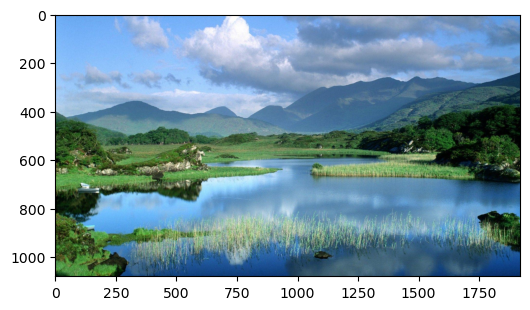

In [30]:
img = cv2.imread("test.jpg")

def show_img(img):
    plt.figure(dpi=100)
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

show_img(img)

In [21]:
def get_pyramid(img):
    out = cv2.pyrDown(img)
    return out

## Learning

In [46]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader

In [86]:
class Backbone(nn.Module):
    def __init__(self, out_dim):
        super(Backbone, self).__init__()
        
        # Define the layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Define the fully connected (linear) layer
        self.fc = nn.Linear(in_features=1568, out_features=out_dim)
    
    def forward(self, x):
        # Perform forward pass
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = x.view(x.size(0), -1)  # Flatten the tensor
        
        x = self.fc(x)
        
        return x

In [76]:
# Define the transformations to apply to the dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=None, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=None, download=True)

# Create dataloaders to load the data in batches
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [77]:
transform(train_dataset[0][0])

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [52]:
import os
import shutil

for i in range(10):
    shutil.rmtree(f"mnist/train/{i}", ignore_errors=True)
    os.makedirs(f"mnist/train/{i}")

In [53]:
import os
from collections import defaultdict

counters = defaultdict(int)

for i, label in train_dataset:
    dst = os.path.join(f"mnist/train/{label}", f"image_{counters[label]}.png")
    if counters[label] < 50:
        i.save(dst)
    
    counters[label] += 1

In [60]:
def generate_downsampled(dataset):
    
    counters = defaultdict(int)
    for img, label in dataset:
        dst = os.path.join(f"mnist/train/{label}", f"image_{counters[label]}_d.png")
        if counters[label]<50:
#             down = get_pyramid(np.array(img))
#             down = F.to_pil_image(down)
            os.remove(dst)
#             down.save(dst)
        counters[label] += 1

In [61]:
generate_downsampled(train_dataset)

In [66]:
from PIL import Image

paths = []

for label in range(10):
    for i in range(50):
        img_path = f"mnist/train/{label}/image_{i}.png"
        paths.append(img_path)

print(len(paths))
        
# sample randomly from these paths 
import random

sampled_paths = random.sample(paths, 250)

for idx, p in enumerate(sampled_paths):
    img = Image.open(p)
    
    img.save(f"mnist/utrain/{idx}.png")

500


In [68]:
src_dir = "mnist/utrain"

imgs = []
# read in the images
for i in os.listdir(src_dir):
    img = Image.open(os.path.join(src_dir, i))
    
    # downsample the image
    ds = get_pyramid(np.array(img))
    
    # save the image with _d suffix
    ds = F.to_pil_image(ds)
    ds.save(os.path.join(src_dir, i.replace(".png", "_d.png")))

In [82]:
# create train_samples

# list the files in the train dir

paths = []
for p in os.listdir("mnist/utrain"):
    if p.endswith("_d.png"): continue
    else:
        paths.append(os.path.join("mnist/utrain", p))


num_triplets = 1000

train_samples = []
for i in range(num_triplets):
    
    # sample anchor and negative points 
    a_path, n_path = random.sample(paths, 2) # without replacement
    
    anchor = transform(Image.open(a_path))
    
    # the positive
    p_path = a_path.replace(".png", "_d.png")
    positive = transform(Image.open(p_path))
    
    # the negative
    negative = transform(Image.open(n_path))
    
    train_samples.append((anchor, positive, negative))

In [91]:

import torch.optim as optim

model = Backbone(512)

triplet_loss = nn.TripletMarginLoss(margin=50.0, p=2.0)

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    for batch_idx, (a, p, n) in enumerate(train_samples):
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass through the network to get embeddings
        ae = model(torch.stack([a], dim=0))
        pe = model(torch.stack([p], dim=0))
        ne = model(torch.stack([n], dim=0))
        
        # Compute the triplet loss
        loss = triplet_loss(ae, pe, ne)
        
        # Backward pass - compute gradients and update weights
        loss.backward()
        optimizer.step()
        
        # Print loss information
        if batch_idx % 200 == 0:
            print(f"Epoch: {epoch+1} [{batch_idx}/{len(train_samples)}]\tLoss: {loss.item():.6f}")


Epoch: 1 [0/1000]	Loss: 49.726238
Epoch: 1 [200/1000]	Loss: 0.000000
Epoch: 1 [400/1000]	Loss: 0.000000
Epoch: 1 [600/1000]	Loss: 0.000000
Epoch: 1 [800/1000]	Loss: 0.000000
Epoch: 2 [0/1000]	Loss: 0.000000
Epoch: 2 [200/1000]	Loss: 0.000000
Epoch: 2 [400/1000]	Loss: 0.000000
Epoch: 2 [600/1000]	Loss: 0.000000
Epoch: 2 [800/1000]	Loss: 0.000000
Epoch: 3 [0/1000]	Loss: 0.000000
Epoch: 3 [200/1000]	Loss: 0.000000
Epoch: 3 [400/1000]	Loss: 0.000000
Epoch: 3 [600/1000]	Loss: 0.000000
Epoch: 3 [800/1000]	Loss: 0.000000
Epoch: 4 [0/1000]	Loss: 0.000000
Epoch: 4 [200/1000]	Loss: 0.000000
Epoch: 4 [400/1000]	Loss: 0.000000
Epoch: 4 [600/1000]	Loss: 0.000000
Epoch: 4 [800/1000]	Loss: 0.000000
Epoch: 5 [0/1000]	Loss: 0.000000
Epoch: 5 [200/1000]	Loss: 0.000000
Epoch: 5 [800/1000]	Loss: 0.000000
Epoch: 6 [0/1000]	Loss: 0.000000
Epoch: 6 [200/1000]	Loss: 0.000000
Epoch: 6 [400/1000]	Loss: 0.000000
Epoch: 6 [600/1000]	Loss: 0.000000
Epoch: 6 [800/1000]	Loss: 0.000000
Epoch: 7 [0/1000]	Loss: 0.00000